In [1]:
from PIL import Image
import json
import torch
import random
from transformers import ViltProcessor, ViltForQuestionAnswering

from tools import utils

In [2]:
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

In [16]:
class Arguments:
    def __init__(self):
        self.data_root = 'data/maplm_v0.1'
        self.output_dir = 'runs'
        self.test_split = 'train'
        self.test_number = -1
        self.exp_label = 'transformer'
        self.random_seed = 42
        self.debug = False

arguments = Arguments()
random.seed(arguments.random_seed)
frames, frame_ids = utils.load_data(arguments)
result_file_name = utils.get_result_file(arguments)

Number of test frames: 10775



In [7]:
for i, frame_id in enumerate(frame_ids):
    frame = frames[frame_id]

    image_list = frame['image']
    qas = frame['qa']

    corrects = []

    image_path = f'{arguments.data_root}/train/{frame_id}/{image_list[1]}'
    try:
        image = Image.open(image_path)
        break
    except:
        continue

In [17]:
qa = qas[0]
if qa['task'] != 'closed choice':
    pass
question = qa['question']
choices = qa['choices']
true_answer: int = qa['answer']

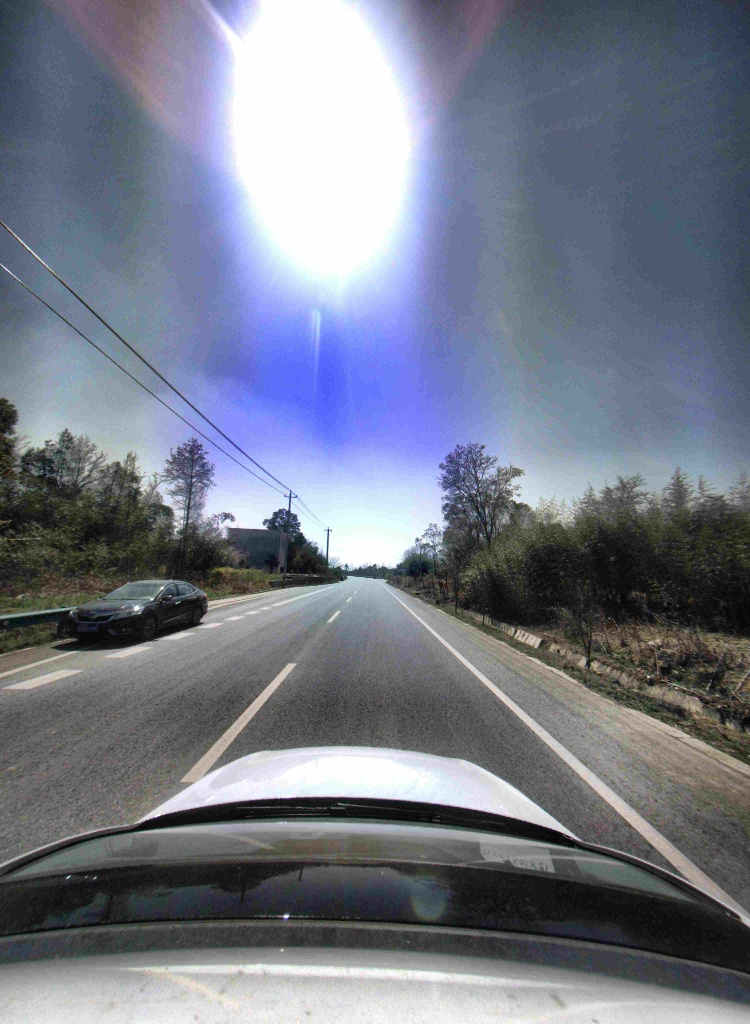

In [9]:
image

In [18]:
problems = json.load(open("data/maplm_v0.1/problems.json"))
img_problem = problems["FR34"]['qa'][2]
text = img_problem['question']
# for choice in img_problem['choices']:
#     text += f" {choice}"
text

'How many lanes in current road?'

In [12]:
inputs = processor(image, text, return_tensors="pt")

In [13]:
with torch.no_grad():
    outputs = model(**inputs)

In [15]:
logits = outputs.logits
idx = logits.argmax(-1).item()
print("Predicted answer:", model.config.id2label[idx])

Predicted answer: 2
